# Confirmed COVID-19 Cases Comparison: The US

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

plt.rcParams["figure.figsize"] = (20,10)

## The Data
#### We pull the data from John Hopkin's to better analyze and plot each respective state

In [20]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
data = pd.read_csv(url)
data.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
count,3.253000e+03,3253.000000,3251.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,...,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,8.390300e+07,839.444205,32090.929560,37.183790,-89.174224,0.000307,0.000307,0.000615,0.000615,0.001537,...,84.716262,94.942515,103.616662,112.714417,121.801721,131.892714,141.848140,152.637565,161.817092,170.705195
std,3.292495e+06,18.091158,17825.153176,8.623023,21.438640,0.017533,0.017533,0.024792,0.024792,0.039181,...,1104.228135,1222.985109,1310.807618,1403.943147,1495.546293,1601.278685,1707.470788,1818.035386,1926.460415,2020.996451
min,1.600000e+01,16.000000,60.000000,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401904e+07,840.000000,19038.000000,34.237321,-98.037489,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,8.403005e+07,840.000000,30045.000000,38.147359,-89.825123,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,7.000000,7.000000
75%,8.404701e+07,840.000000,47010.000000,41.684463,-82.793570,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,17.000000,18.000000,21.000000,23.000000,25.000000,27.000000,29.000000,31.000000,33.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,57159.000000,63306.000000,67551.000000,72181.000000,76876.000000,81803.000000,87028.000000,92384.000000,98308.000000,103208.000000


In [21]:
def getState(state):
    StateData = data[data['Province_State']==state]
    return StateData

In [22]:
def getStateValues(stateData):
    DataValues = []
    for column in stateData:
        if column=="UID":
            continue
        elif column=='iso2':
            continue
        elif column=='iso3':
            continue
        elif column=='code3':
            continue
        elif column=='FIPS':
            continue
        elif column=='Admin2':
            continue
        elif column=='Province_State':
            continue
        elif column=='Country_Region':
            continue
        elif column=='Lat':
            continue
        elif column=='Long_':
            continue
        elif column=='Combined_Key':
            continue
        else:
            item = int(stateData[column].sum())
            DataValues.append(item)
    return DataValues

In [23]:
Texas = getState("Texas")

In [24]:
TexasVal = getStateValues(Texas)

In [25]:
# top 5: New York, New Jersey, Michigan, California, Louisiana
NYVal = getStateValues(getState("New York"))
NJVal = getStateValues(getState("New Jersey"))
MichiganVal = getStateValues(getState("Michigan"))
CaliforniaVal = getStateValues(getState("California"))
LouisianaVal = getStateValues(getState("Louisiana"))

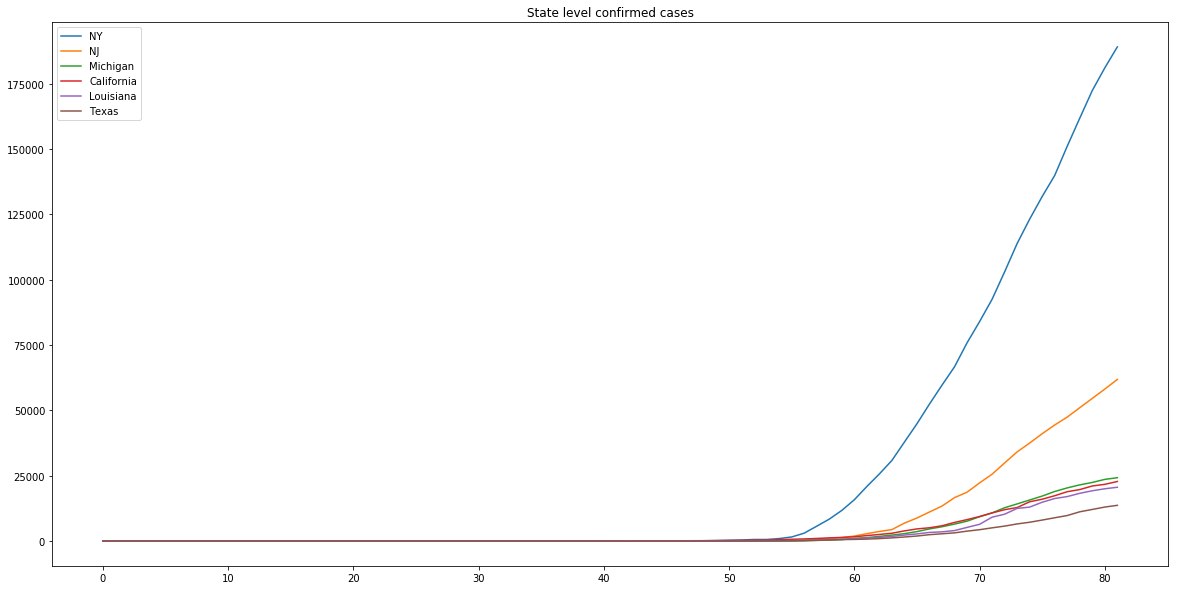

In [26]:
plt.title("State level confirmed cases")
plt.plot(NYVal, label="NY")
plt.plot(NJVal, label="NJ")
plt.plot(MichiganVal, label="Michigan")
plt.plot(CaliforniaVal, label="California")
plt.plot(LouisianaVal, label="Louisiana")
plt.plot(TexasVal, label="Texas")
plt.legend()
plt.show()

### Overall totals of confirmed cases for these 6 states

In [27]:
# rate of increase of confirmed cases
def difference(DataValues):
    DataDifference = DataValues.copy()
    for i in range(len(DataDifference) -1, 0, -1):
        DataDifference[i] = DataDifference[i] - DataDifference[i-1]
    DataDifference[0] = 0
    return DataDifference

In [28]:
def indexes(Data):
    index = []
    count = 0
    for i in Data:
        index.append(count)
        count = count + 1
    return index

In [29]:
TexasDiff = difference(TexasVal)
NYDiff = difference(NYVal)
NJDiff = difference(NJVal)
MichiganDiff = difference(MichiganVal)
CaliforniaDiff = difference(CaliforniaVal)
LouisianaDiff = difference(LouisianaVal)

In [30]:
# calculate slope
TexasReg = LinearRegression()
TexasReg.fit(np.array(indexes(TexasDiff[55:])).reshape(-1, 1), np.array(TexasDiff[55:]).reshape(-1,1))

NYReg = LinearRegression()
NYReg.fit(np.array(indexes(NYDiff[55:])).reshape(-1, 1), np.array(NYDiff[55:]).reshape(-1,1))

NJReg = LinearRegression()
NJReg.fit(np.array(indexes(NJDiff[55:])).reshape(-1, 1), np.array(NJDiff[55:]).reshape(-1,1))

MichiganReg = LinearRegression()
MichiganReg.fit(np.array(indexes(MichiganDiff[55:])).reshape(-1, 1), np.array(MichiganDiff[55:]).reshape(-1,1))

CaliforniaReg = LinearRegression()
CaliforniaReg.fit(np.array(indexes(CaliforniaDiff[55:])).reshape(-1, 1), np.array(CaliforniaDiff[55:]).reshape(-1,1))

LouisianaReg = LinearRegression()
LouisianaReg.fit(np.array(indexes(LouisianaDiff[55:])).reshape(-1, 1), np.array(LouisianaDiff[55:]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

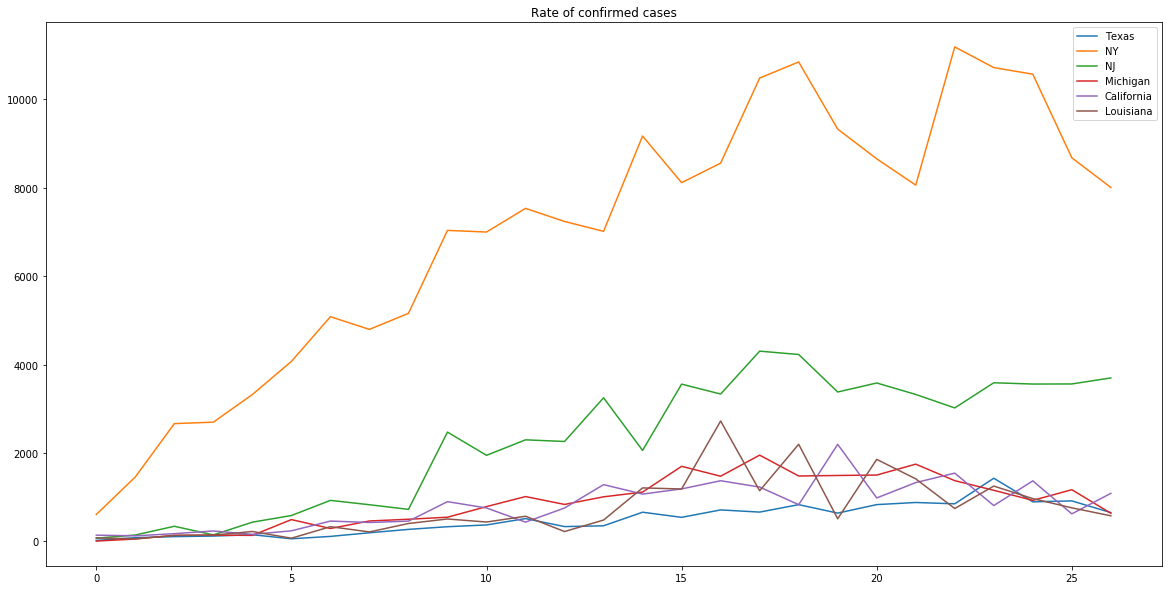

In [31]:
plt.title("Rate of confirmed cases")
plt.plot(TexasDiff[55:], label="Texas")
plt.plot(NYDiff[55:], label="NY")
plt.plot(NJDiff[55:], label="NJ")
plt.plot(MichiganDiff[55:], label="Michigan")
plt.plot(CaliforniaDiff[55:], label="California")
plt.plot(LouisianaDiff[55:], label="Louisiana")
plt.legend()
plt.show()

In [32]:
print("Texas rate: ", TexasReg.coef_)
print("New York rate: ", NYReg.coef_)
print("New Jersey rate: ", NJReg.coef_)
print("Michigan rate: ", MichiganReg.coef_)
print("California rate: ", CaliforniaReg.coef_)
print("Louisiana rate: ", LouisianaReg.coef_)

Texas rate:  [[40.28083028]]
New York rate:  [[338.64407814]]
New Jersey rate:  [[163.78327228]]
Michigan rate:  [[55.21062271]]
California rate:  [[48.5]]
Louisiana rate:  [[51.05067155]]


#### Here we illustrate and calculate the rates for these 6 states. Although NY has the highest number of cases, we can see the rate oscillating but not spiking above any previous rates, which shows that New York is on the road to recovery.

In [33]:
# states with strict measures: Montana, Ohio, Kansas, New Mexico, Washington
WashingtonVal = getStateValues(getState("Washington"))
MontanaVal = getStateValues(getState("Montana"))
OhioVal = getStateValues(getState("Ohio"))
KansasVal = getStateValues(getState("Kansas"))
NMVal = getStateValues(getState("New Mexico"))

In [34]:
WashingtonDiff = difference(WashingtonVal)
MontanaDiff = difference(MontanaVal)
OhioDiff = difference(OhioVal)
KansasDiff = difference(KansasVal)
NMDiff = difference(NMVal)

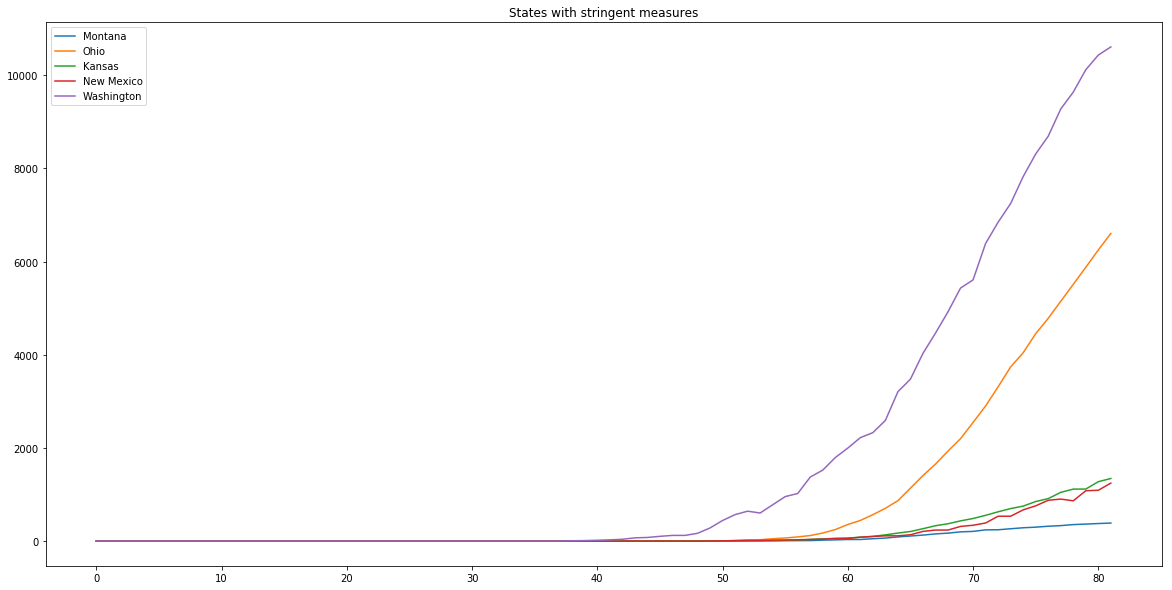

In [35]:
plt.title("States with stringent measures")
plt.plot(MontanaVal, label="Montana")
plt.plot(OhioVal, label="Ohio")
plt.plot(KansasVal, label="Kansas")
plt.plot(NMVal, label="New Mexico")
plt.plot(WashingtonVal, label="Washington")
plt.legend()
plt.show()

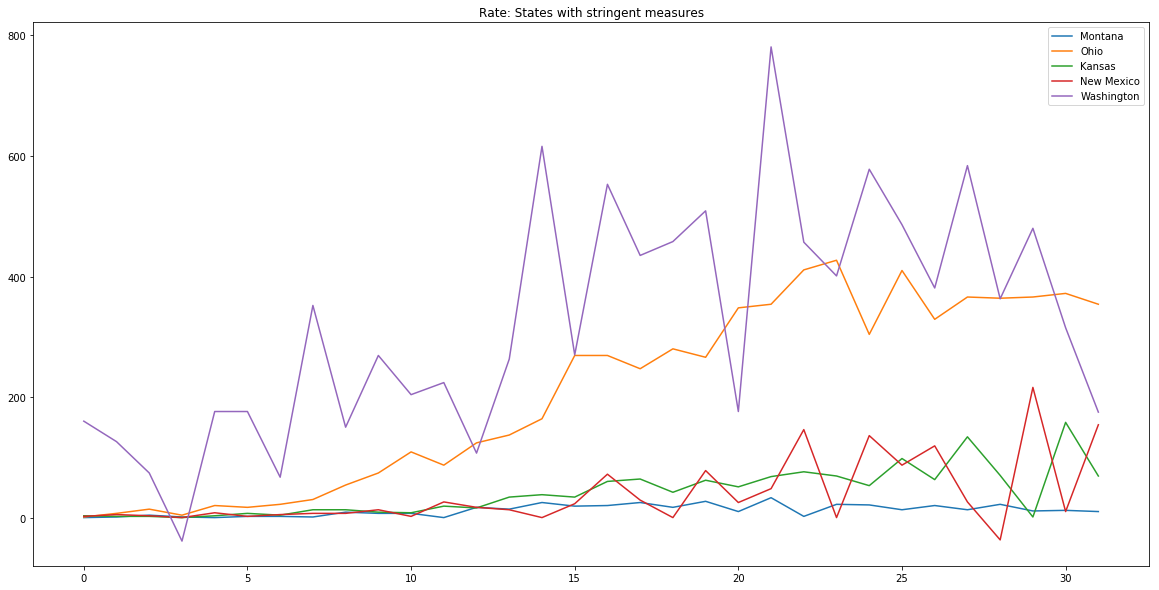

In [36]:
plt.title("Rate: States with stringent measures")
plt.plot(MontanaDiff[50:], label="Montana")
plt.plot(OhioDiff[50:], label="Ohio")
plt.plot(KansasDiff[50:], label="Kansas")
plt.plot(NMDiff[50:], label="New Mexico")
plt.plot(WashingtonDiff[50:], label="Washington")
plt.legend()
plt.show()

#### These 5 states have stricter measures regarding lockdown and stay at home orders. Washington was one of the first sites infected, and now the overall rate is much flatter meaning that they are doing well with recovering. Similarly, Ohio has kept their rates down by enforcing these strict measures.